# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [17,8]

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_curve, accuracy_score, f1_score, log_loss

from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

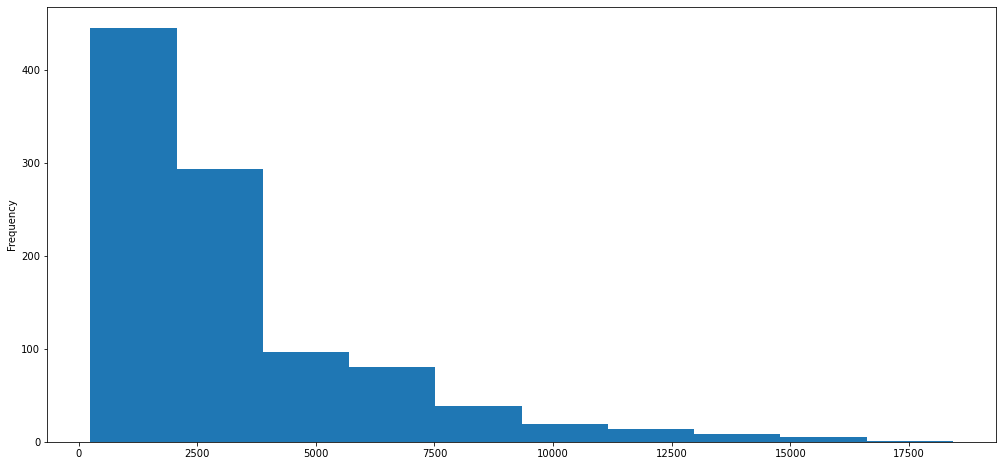

In [6]:
df['CreditAmount'].plot(kind='hist')
plt.show()

# 3b. Create creditability dataframe

In [9]:
df_target = df['Creditability']

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [14]:
df1 = pd.concat([df,df_target],axis=1)

In [15]:
df_target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

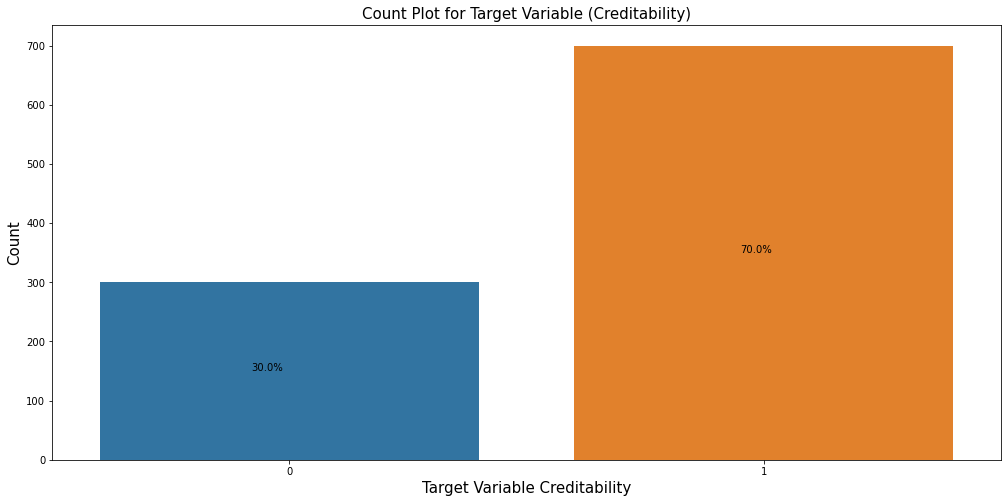

In [22]:
sns.countplot(df_target)
plt.text(x = -0.08, y = df_target.value_counts()[0] - 150, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] - 350, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable (Creditability)', fontsize = 15)
plt.xlabel('Target Variable Creditability', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# 6. Prepare input data for the model

In [24]:
SS = StandardScaler()
df_feature = SS.fit_transform(df.drop('Creditability', axis = 1))
df_feature = pd.DataFrame(data = df_feature, columns = df.drop('Creditability', axis = 1).columns)
X = sm.add_constant(df_feature)
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 3) (300, 3) (700,) (300,)


# 7. Fit logistic regression model

In [26]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

# 8. Test accuracy calculation

In [27]:
y_pred = logreg_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred))

Test Accuracy: 0.67


# 9. Build a confusion matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 11,  87],
       [ 12, 190]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

Text(0.5, 0, 'Non Default Creditability')

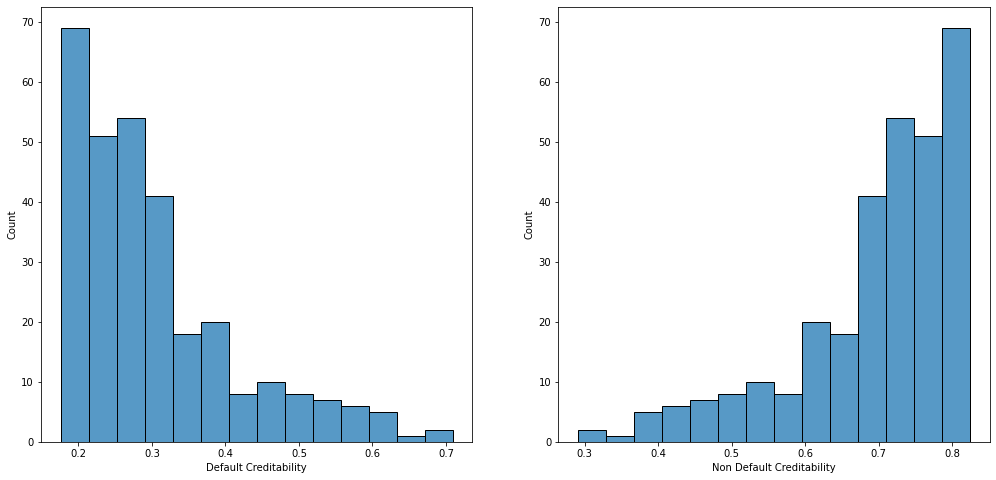

In [29]:
y_pred_prob = logreg_model.predict_proba(X_test)
plt.subplot(1,2,1)
sns.histplot(y_pred_prob[:,0])
plt.xlabel('Default Creditability')
plt.subplot(1,2,2)
sns.histplot(y_pred_prob[:,1])
plt.xlabel('Non Default Creditability')